In [1]:
from pathlib import Path

from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from micro_price_trading.config import TWENTY_SECOND_DAY
from micro_price_trading import (Preprocess,
                                 TwoAssetSimulation,
                                 PairsTradingHistory,
                                 PairsTradingBroker,
                                 PairsTradingEnvironment)

PATH = Path().cwd()

In [2]:
raw = Preprocess('TBT_TBF_data.csv', res_bin=7)
data = raw.process()

simulation = TwoAssetSimulation(data=data,
                                steps=TWENTY_SECOND_DAY,
                                randomness=1.0,
                                seed=42)
broker = PairsTradingBroker(amounts=(500, -1000),
                            fixed_buy_cost=0,
                            fixed_sell_cost=0,
                            variable_buy_cost=0,
                            variable_sell_cost=0,
                            spread=0,
                            max_position=10)
history = PairsTradingHistory(start_state=simulation.current_state,
                              start_cash=100,
                              max_steps=simulation.ite,
                              start_allocation=broker.amounts,
                              max_position=broker.max_position)

In [51]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 5000
SEED = 0

env = PairsTradingEnvironment(
    data,
    steps=60*60,
    no_trade_period=20,
    max_position=1,
    start_cash=500,
    threshold=-100,
    randomness=1.0,
    seed=SEED
)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=100,
    loss_type="l2",
    lr=1e-5,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=NUM_AGENT_STEPS//5,
    seed=SEED,
)
trainer.train()

Num steps: 1000     Return: 45.2    Time: 0:02:00
Num steps: 2000     Return: 979.5   Time: 0:03:51
Num steps: 3000     Return: 893.9   Time: 0:05:34
Num steps: 4000     Return: 860.8   Time: 0:07:15
Num steps: 5000     Return: 558.6   Time: 0:08:33


In [52]:
env.portfolio_history[-1].shape

(3600,)

In [53]:
[e.time for e in env.portfolio_history[-1]]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 

In [54]:
env.portfolio_history[-1, :19]

array([PairsTradingPortfolio(time=0, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.405), res_imbalance_state='301', trade=(PairsTradingTrade(asset=1, shares=28.145229383619476, execution_price=17.765, total_cost=500.0, buy_sell='Buy', mid_price=17.765), PairsTradingTrade(asset=2, shares=-60.957025297165494, execution_price=16.405, total_cost=-1000.0, buy_sell='Sell', mid_price=16.405)), position=1, forced_action=False),
       PairsTradingPortfolio(time=1, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.395), res_imbalance_state='301', trade=None, position=1, forced_action=True),
       PairsTradingPortfolio(time=2, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.384999999999998), res_imbalance_state='301', trade=None, position=1, forced_action=True),
       PairsTradingPortfolio(time=3, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.374

In [55]:
env.portfolio_history[-1]

array([PairsTradingPortfolio(time=0, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.405), res_imbalance_state='301', trade=(PairsTradingTrade(asset=1, shares=28.145229383619476, execution_price=17.765, total_cost=500.0, buy_sell='Buy', mid_price=17.765), PairsTradingTrade(asset=2, shares=-60.957025297165494, execution_price=16.405, total_cost=-1000.0, buy_sell='Sell', mid_price=16.405)), position=1, forced_action=False),
       PairsTradingPortfolio(time=1, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.395), res_imbalance_state='301', trade=None, position=1, forced_action=True),
       PairsTradingPortfolio(time=2, cash=1000.0, shares=(56.29045876723895, -121.91405059433099), mid_prices=(17.765, 16.384999999999998), res_imbalance_state='301', trade=None, position=1, forced_action=True),
       ...,
       PairsTradingPortfolio(time=1217, cash=999.9999999999994, shares=(67.19499326129556, -294.2179161411284), m

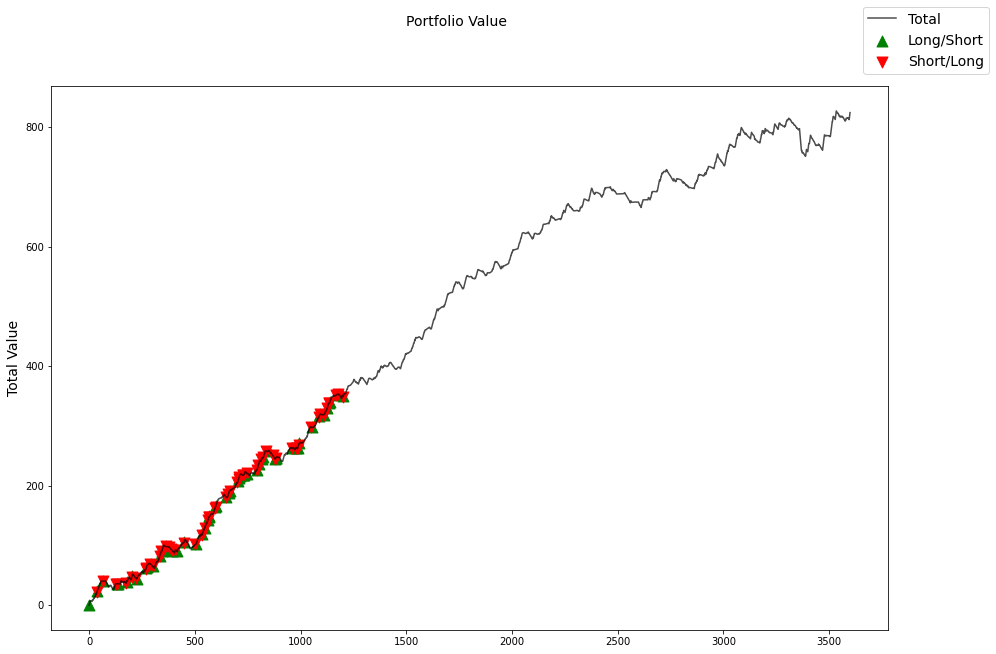

In [56]:
env.plot()

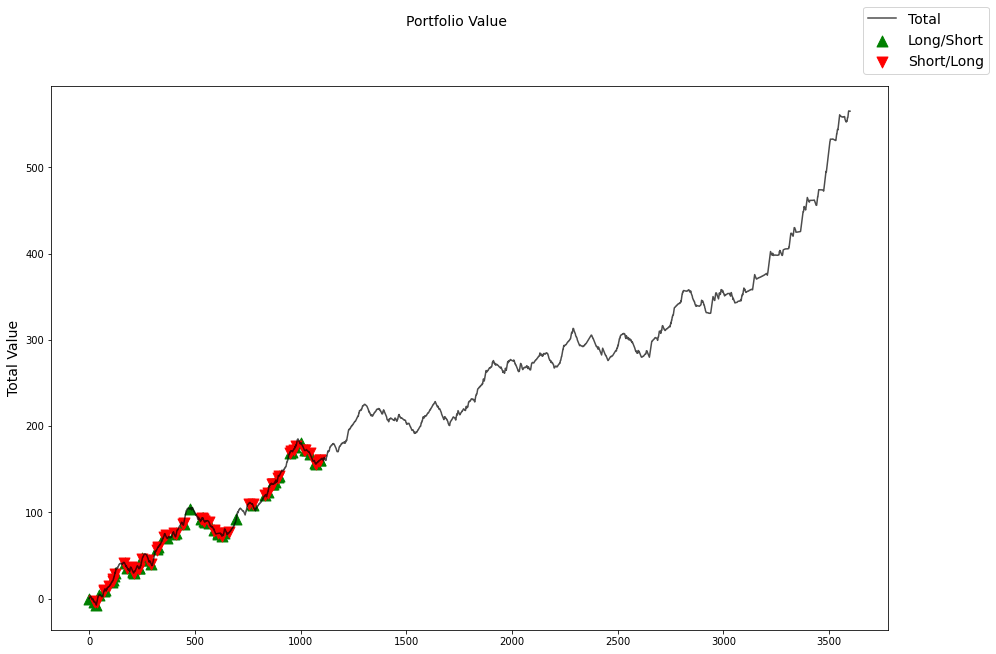

In [57]:
env_test.plot()

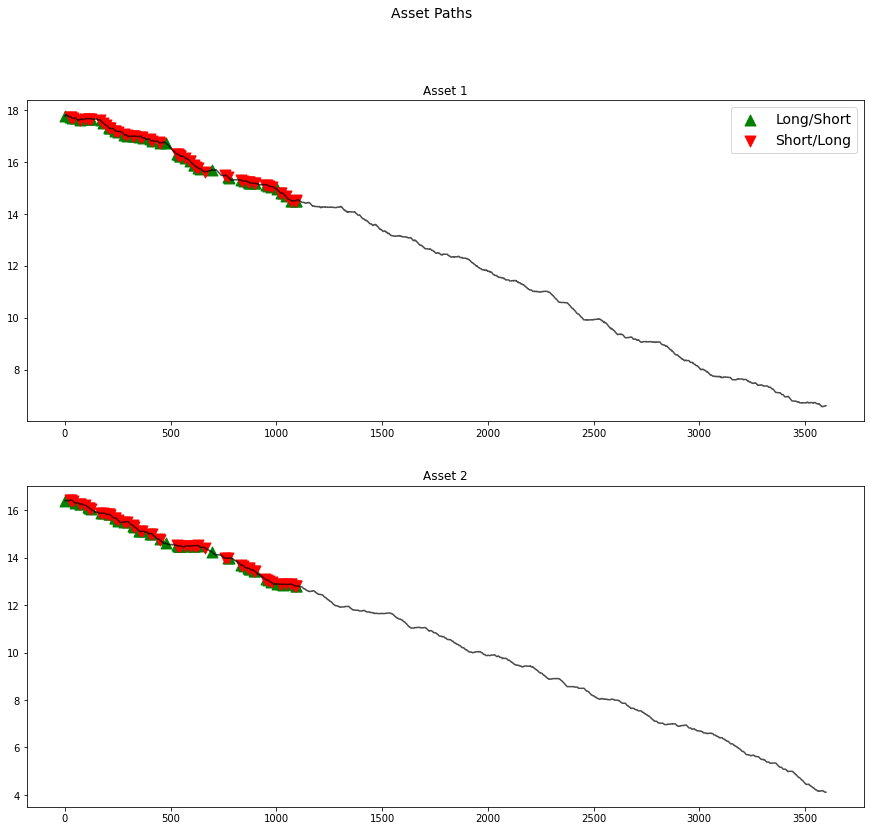

In [58]:
env_test.plot('asset_paths')

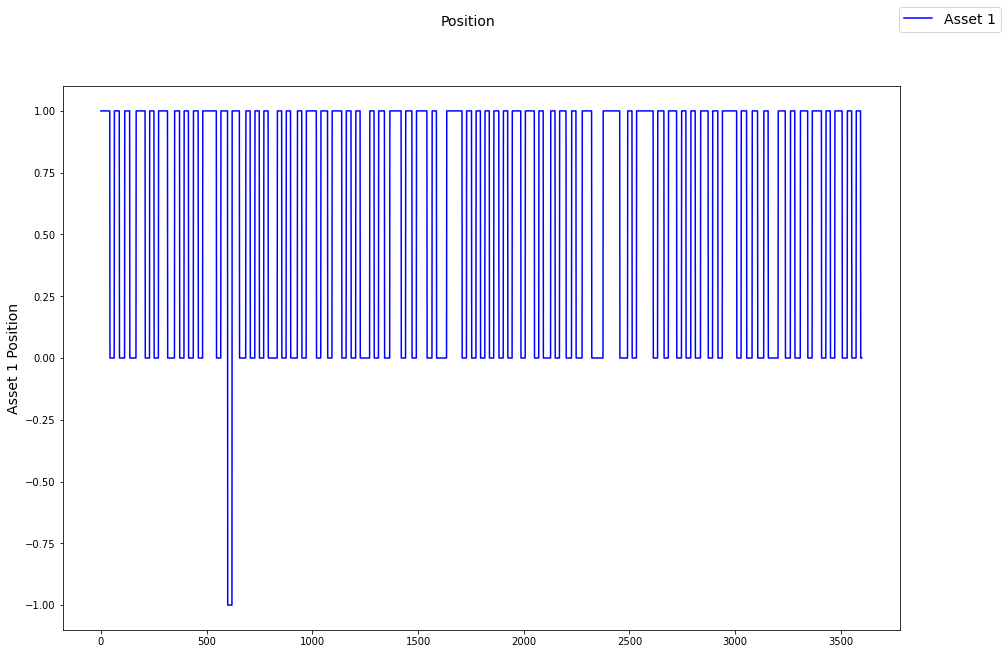

In [59]:
env_test.plot('position_history')

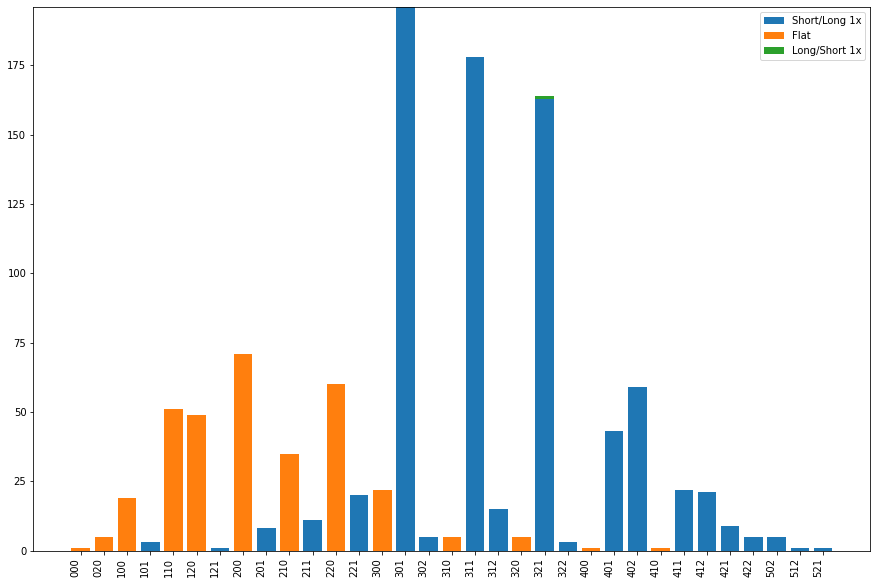

In [60]:
env_test.plot('summarize_decisions', plot_num=1)

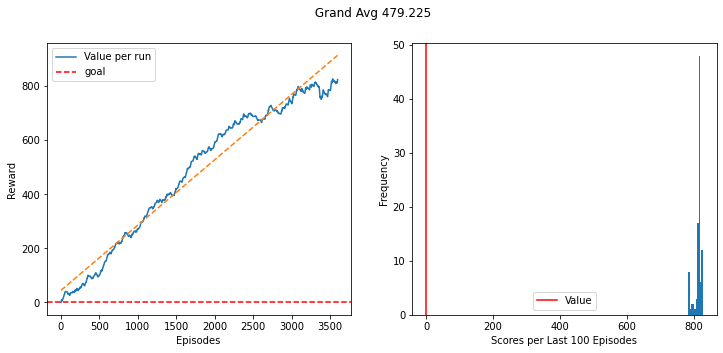

In [61]:
env.plot('learning_progress')